F1-score (avg): 0.5764880952380953  std: 0.18206186924969728
Accuracy (avg): 0.8465909090909092  std: 0.05877318427720795

F1-scores per fold: [0.26666667 0.71428571 0.625      0.7       ]
Accuracies per fold: [0.75       0.90909091 0.86363636 0.86363636]


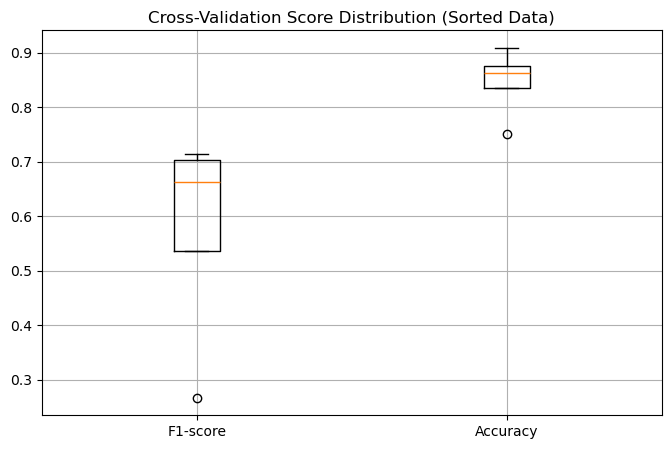

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler  # 如果你用的是归一化数据
import matplotlib.pyplot as plt

# 1. 读取排序后的训练数据
df = pd.read_csv("../data/train_robot_v1.csv")
df_sorted = df.sort_values(by="Target", ascending=False)
df_sorted.to_csv("../data/train_robot_sorted_v1.csv", index=False)

df_sorted = pd.read_csv("../data/train_robot_sorted_v1.csv")

X = df_sorted.drop(columns=["Target"])
y = df_sorted["Target"]

# # ✅ 如需归一化数据，取消注释下列两行：
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# 2. 定义 MLP 神经网络模型
model = MLPClassifier(
    hidden_layer_sizes=(50,25,12,6),   # 隐藏层结构，改成 (100,), (50, 50), (100, 50, 25) 等试不同结构
    activation='tanh',          # 激活函数,activation 换成 'tanh',relu,'logistic' 看是否更适合
    solver='lbfgs',              # 优化器adam,lbfgs,sgd
    max_iter=500,               # 最大迭代次数
    random_state=42,             # 固定随机种子
    
    
)

# 3. 使用交叉验证评估 F1 和 Accuracy
scoring = {'f1': 'f1', 'accuracy': 'accuracy'}
scores = cross_validate(
    model, X, y, cv=4, scoring=scoring
)

# 4. 打印结果
print("F1-score (avg):", scores['test_f1'].mean(), " std:", scores['test_f1'].std())
print("Accuracy (avg):", scores['test_accuracy'].mean(), " std:", scores['test_accuracy'].std())

print("\nF1-scores per fold:", scores['test_f1'])
print("Accuracies per fold:", scores['test_accuracy'])

# 5. 可视化评分分布
plt.figure(figsize=(8, 5))
plt.boxplot(
    [scores['test_f1'], scores['test_accuracy']],
    tick_labels=['F1-score', 'Accuracy']
)
plt.title("Cross-Validation Score Distribution (Sorted Data)")
plt.grid(True)
plt.show()


e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = 

,layers,activation,solver,F1-avg,F1-std,Acc-avg,Acc-std
0,"(50, 25, 12)",relu,adam,0.5142,0.3000,0.8636,0.0425
1,"(50, 25, 12)",tanh,adam,0.0000,0.0000,0.8011,0.0098
2,"(50, 25, 12)",logistic,adam,0.0000,0.0000,0.8011,0.0098
3,"(50, 25, 12)",relu,lbfgs,0.7016,0.0412,0.8807,0.0373
4,"(50, 25, 12)",tanh,lbfgs,0.4415,0.1194,0.7784,0.0336
5,"(64,)",relu,lbfgs,0.6975,0.1288,0.8807,0.0518
6,"(128, 64)",relu,lbfgs,0.7431,0.0585,0.8977,0.0377
7,"(100, 50, 25, 10)",relu,lbfgs,0.4736,0.2263,0.7955,0.0771
8,"(64, 32, 16, 8)",relu,lbfgs,0.3412,0.1892,0.7500,0.0579
9,"(50, 25, 12, 6)",relu,lbfgs,0.5293,0.1491,0.7898,0.1008


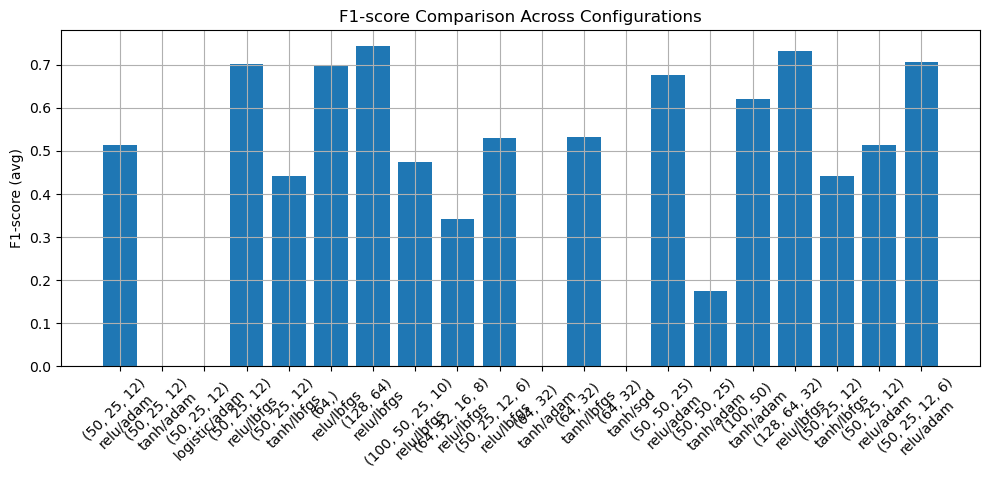

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler  # 如果你用的是归一化数据
import matplotlib.pyplot as plt

# 1. 读取排序后的训练数据
df = pd.read_csv("../data/train_robot_v1.csv")
df_sorted = df.sort_values(by="Target", ascending=False)
df_sorted.to_csv("../data/train_robot_sorted_v1.csv", index=False)

df_sorted = pd.read_csv("../data/train_robot_sorted_v1.csv")

X = df_sorted.drop(columns=["Target"])
y = df_sorted["Target"]

# # ✅ 如需归一化数据，取消注释下列两行：
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


config_list = [
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "logistic",    "solver": "adam"},
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "lbfgs"},
    
    {"layers": (64,),            "activation": "relu","solver": "lbfgs"},
    {"layers": (128, 64),            "activation": "relu","solver": "lbfgs"},
    {"layers": (100, 50, 25, 10),            "activation": "relu","solver": "lbfgs"},
    {"layers": (64, 32, 16, 8),            "activation": "relu","solver": "lbfgs"},
    {"layers": (50, 25, 12, 6),            "activation": "relu","solver": "lbfgs"},
    
    {"layers": (64, 32),            "activation": "tanh","solver": "adam"},
    {"layers": (64, 32),            "activation": "tanh","solver": "lbfgs"},
    {"layers": (64, 32),            "activation": "tanh","solver": "sgd"},
    
    
    {"layers": (50, 50,25),       "activation": "relu",    "solver": "adam"},
    {"layers": (50, 50,25),          "activation": "tanh",    "solver": "adam"},
    {"layers": (100, 50),            "activation": "tanh","solver": "adam"},
    {"layers": (128, 64, 32),        "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "adam"},
    {"layers": (50, 25, 12,6),         "activation": "relu",    "solver": "adam"},
]


results = []

for config in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=config["layers"],
        activation=config["activation"],
        solver=config["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(
        model, X, y,
        cv=4,
        scoring={"f1": "f1", "accuracy": "accuracy"}
    )
    
    results.append({
        "layers": config["layers"],
        "activation": config["activation"],
        "solver": config["solver"],
        "F1-avg": round(scores["test_f1"].mean(), 4),
        "F1-std": round(scores["test_f1"].std(), 4),
        "Acc-avg": round(scores["test_accuracy"].mean(), 4),
        "Acc-std": round(scores["test_accuracy"].std(), 4)
    })

# ----------------------------
# 4. 输出结果表格
# ----------------------------
result_df = pd.DataFrame(results)
display(result_df)

# ----------------------------
# 5. 可视化 F1-score 对比（可选）
# ----------------------------
plt.figure(figsize=(10, 5))
plt.bar(range(len(result_df)), result_df["F1-avg"], tick_label=[
    f"{r['layers']}\n{r['activation']}/{r['solver']}" for r in results
])
plt.ylabel("F1-score (avg)")
plt.xticks(rotation=45)
plt.title("F1-score Comparison Across Configurations")
plt.grid(True)
plt.tight_layout()
plt.show()
